#   Xây dựng model xử lý dữ liệu hình ảnh

Link: https://pythonnangcao.com/product-category/machine-learning/

Import

In [67]:
import numpy as np
import matplotlib.pyplot as plt

from tensorflow.keras.datasets import cifar10
from tensorflow.keras import layers
from tensorflow.keras import models
from tensorflow.keras.utils import to_categorical

Download bộ ảnh của cifar10

In [68]:
(Xtrain, ytrain), (Xtest, ytest) = cifar10.load_data()

In [69]:
print(Xtrain.shape, Xtest.shape)
print(ytrain)

classes = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

(50000, 32, 32, 3) (10000, 32, 32, 3)
[[6]
 [9]
 [9]
 ...
 [9]
 [1]
 [1]]


Chuẩn hóa dữ liệu (Normalization)

In [70]:
Xtrain, Xtest = Xtrain/255, Xtest/255

Encoding (One Hot Encoding)

In [71]:
ytrain, ytest = to_categorical(ytrain), to_categorical(ytest)

Xây dựng model

In [41]:
model_training_first = models.Sequential([
    # layers.Conv2D(32, (3, 3), input_shape=(32, 32, 3), activation='relu'),
    # layers.MaxPool2D((2, 2)),
    # layers.Dropout(0.15),

    # layers.Conv2D(64, (3, 3), activation='relu'),
    # layers.MaxPool2D((2, 2)),
    # layers.Dropout(0.20),

    # layers.Conv2D(128, (3, 3), activation='relu'),
    # layers.MaxPool2D((2, 2)),
    # layers.Dropout(0.20),

    layers.Flatten(input_shape=(32, 32, 3)),
    layers.Dense(3000, activation='relu'),
    layers.Dense(1000, activation='relu'),
    layers.Dense(10, activation='softmax'), # chính là cái dự đoán cuối cùng, 10 dense -> 10 classes
])
model_training_first.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_3 (Flatten)         (None, 3072)              0         
                                                                 
 dense_6 (Dense)             (None, 3000)              9219000   
                                                                 
 dense_7 (Dense)             (None, 1000)              3001000   
                                                                 
 dense_8 (Dense)             (None, 10)                10010     
                                                                 
Total params: 12,230,010
Trainable params: 12,230,010
Non-trainable params: 0
_________________________________________________________________


Bộ tối ưu hóa

In [42]:
model_training_first.compile(optimizer='adam',
                            loss='categorical_crossentropy',
                            metrics=['accuracy'])

Train dữ liệu

In [43]:
model_training_first.fit(Xtrain, ytrain, epochs=10) # thông thường lặp epochs = 250

Epoch 1/10
1563/1563 [==============================] - 117s 74ms/step - loss: 1.8162 - accuracy: 0.3556
Epoch 2/10
1563/1563 [==============================] - 115s 74ms/step - loss: 1.6277 - accuracy: 0.4260
Epoch 3/10
1563/1563 [==============================] - 116s 74ms/step - loss: 1.5447 - accuracy: 0.4563
Epoch 4/10
1563/1563 [==============================] - 115s 74ms/step - loss: 1.4839 - accuracy: 0.4762
Epoch 5/10
1563/1563 [==============================] - 118s 75ms/step - loss: 1.4367 - accuracy: 0.4959
Epoch 6/10
1563/1563 [==============================] - 117s 75ms/step - loss: 1.3913 - accuracy: 0.5106
Epoch 7/10
1563/1563 [==============================] - 117s 75ms/step - loss: 1.3542 - accuracy: 0.5226
Epoch 8/10
1563/1563 [==============================] - 118s 75ms/step - loss: 1.3183 - accuracy: 0.5369
Epoch 9/10
1563/1563 [==============================] - 119s 76ms/step - loss: 1.2871 - accuracy: 0.5508
Epoch 10/10
1563/1563 [==============================] 

Lưu model

In [61]:
# model_training_first.save('model-cifar10.h5')

Load model

In [72]:
models = models.load_model('model-cifar10.h5')

Predict

1/1 [==============================] - 0s 32ms/step
[[0.00512694 0.00255362 0.03579985 0.15396008 0.2081321  0.14213212
  0.3844957  0.05735767 0.00254581 0.00789619]]
frog


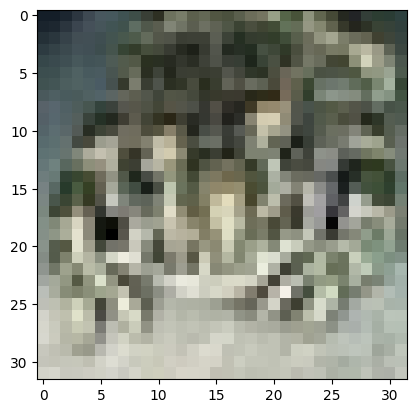

In [51]:
# pred = models.predict(Xtest[1009].reshape((-1, 32, 32, 3)))
# print(pred) # 10 xác suất hình đó rơi vào nhóm nào

# print(classes[np.argmax(pred)])

# plt.imshow(Xtest[1009])
# plt.show()

In [73]:
np.random.shuffle(Xtest)

1/1 [==============================] - 0s 29ms/step


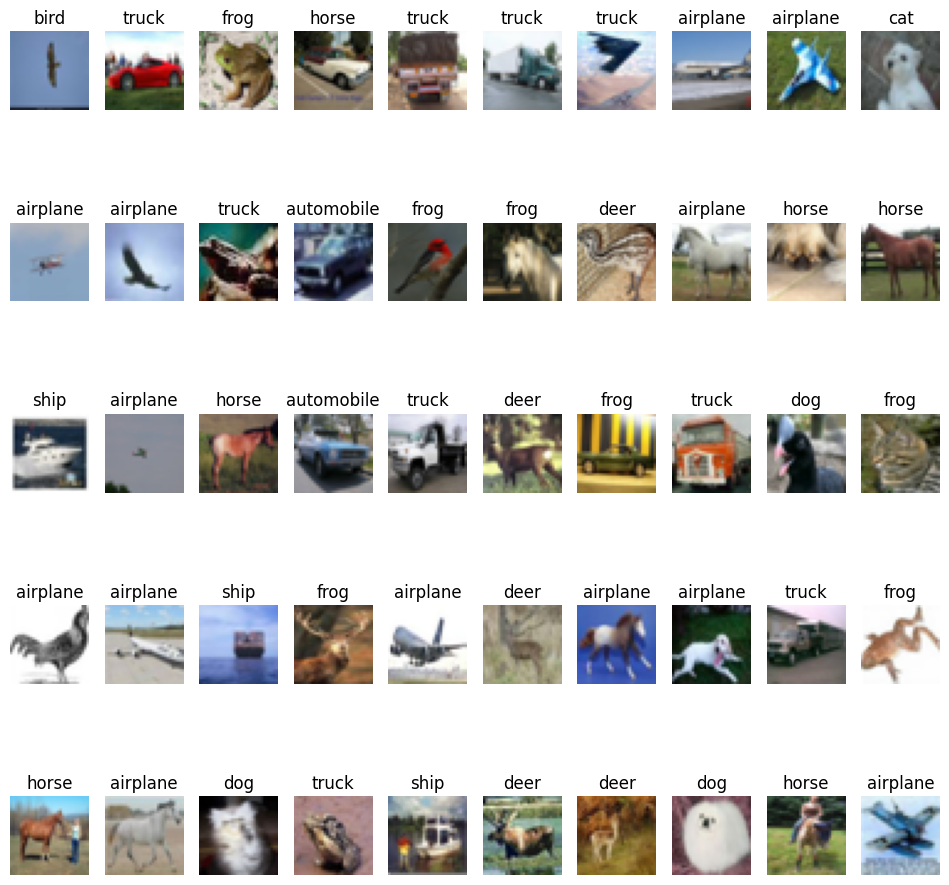

In [76]:
fig = plt.figure(figsize=(12,12))
for i in range(50):
    plt.subplot(5, 10, i+1)
    plt.imshow(Xtest[i])
    plt.title(classes[np.argmax(models.predict(Xtest[i].reshape((-1, 32, 32, 3))))])
    plt.axis('off')

plt.show()